Source: Kaggle at The Devastor
Analyzing Customer Spending Habits
By: Vineet Bahl
https://www.kaggle.com/datasets/thedevastator/analyzing-customer-spending-habits-to-improve-sa

**DATA PREP/CLEANING**

In [390]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [2]:
# import dataset file
df_csh = pd.read_csv('SalesForCourse_quizz_table.csv')
print(df_csh.head())
print(df_csh.info())

   index      Date    Year     Month  Customer Age Customer Gender  \
0      0  02/19/16  2016.0  February          29.0               F   
1      1  02/20/16  2016.0  February          29.0               F   
2      2  02/27/16  2016.0  February          29.0               F   
3      3  03/12/16  2016.0     March          29.0               F   
4      4  03/12/16  2016.0     March          29.0               F   

         Country       State Product Category     Sub Category  Quantity  \
0  United States  Washington      Accessories  Tires and Tubes       1.0   
1  United States  Washington         Clothing           Gloves       2.0   
2  United States  Washington      Accessories  Tires and Tubes       3.0   
3  United States  Washington      Accessories  Tires and Tubes       2.0   
4  United States  Washington      Accessories  Tires and Tubes       3.0   

   Unit Cost  Unit Price   Cost  Revenue  Column1  
0      80.00  109.000000   80.0    109.0      NaN  
1      24.50   28.

In [3]:
# drop columns
df_csh.drop(['index', 'Column1'], axis=1, inplace=True)
print(df_csh.head())

       Date    Year     Month  Customer Age Customer Gender        Country  \
0  02/19/16  2016.0  February          29.0               F  United States   
1  02/20/16  2016.0  February          29.0               F  United States   
2  02/27/16  2016.0  February          29.0               F  United States   
3  03/12/16  2016.0     March          29.0               F  United States   
4  03/12/16  2016.0     March          29.0               F  United States   

        State Product Category     Sub Category  Quantity  Unit Cost  \
0  Washington      Accessories  Tires and Tubes       1.0      80.00   
1  Washington         Clothing           Gloves       2.0      24.50   
2  Washington      Accessories  Tires and Tubes       3.0       3.67   
3  Washington      Accessories  Tires and Tubes       2.0      87.50   
4  Washington      Accessories  Tires and Tubes       3.0      35.00   

   Unit Price   Cost  Revenue  
0  109.000000   80.0    109.0  
1   28.500000   49.0     57.0  
2 

In [4]:
# count null values
df_csh.isnull().sum()

Date                1
Year                1
Month               1
Customer Age        1
Customer Gender     1
Country             1
State               1
Product Category    1
Sub Category        1
Quantity            1
Unit Cost           1
Unit Price          1
Cost                1
Revenue             0
dtype: int64

In [160]:
# drop null values
df_csh.dropna(inplace=True)

In [297]:
# convert dtypes
df_csh['Date']= pd.to_datetime(df_csh['Date'])
df_csh['Year'] = df_csh['Year'].astype(str).str.split('.', expand=True)[0]
df_csh['Month']= df_csh['Month'].astype(str)
df_csh['Customer Age']= df_csh['Customer Age'].astype(int)
df_csh['Quantity']= df_csh['Quantity'].astype(int)

In [162]:
# create a new column for Unit Margin
df_csh['Unit Margin']= (df_csh['Unit Price'] - df_csh['Unit Cost']).astype(float)

# create a new column for Profit
df_csh['Profit']= (df_csh['Revenue'] - df_csh['Cost']).astype(float)

# create a new column for Profit Margin
df_csh['Profit Margin']= ((df_csh['Revenue'] - df_csh['Cost'])/ (df_csh['Revenue'])).astype(float)

#create a new column for Profit Margin as a percentage
df_csh['Profit Margin(%)']= (df_csh['Profit Margin']*100).astype(float)

# create a new column for Age Group
age_group_bins= [0, 18, 30, 40, 50, 60, 70, 90]
age_group_labels= ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71+']
df_csh['Age Group']= pd.cut(df_csh['Customer Age'], bins= age_group_bins, labels= age_group_labels, right= False).astype('category')

# move column positions
column_to_move= df_csh.pop('Age Group')
df_csh.insert(4, 'Age Group', column_to_move)
move_unit_margin= df_csh.pop('Unit Margin')
df_csh.insert(13, 'Unit Margin', move_unit_margin)
move_profit= df_csh.pop('Profit')
df_csh.insert(16, 'Profit', move_profit)

# examine the distribution of numerical variables
print(df_csh.describe())

# convert cleaned dataframe to csv file to use in Tableau
df_csh.to_csv("df_csh.csv", index= False)

       Customer Age      Quantity     Unit Cost    Unit Price   Unit Margin  \
count  34866.000000  34866.000000  34866.000000  34866.000000  34866.000000   
mean      36.382895      2.002524    349.880567    389.232485     39.351919   
std       11.112902      0.813936    490.015846    525.319091    104.934925   
min       17.000000      1.000000      0.670000      0.666667   -937.000000   
25%       28.000000      1.000000     45.000000     53.666667      3.000000   
50%       35.000000      2.000000    150.000000    179.000000     14.500000   
75%       44.000000      3.000000    455.000000    521.000000     53.000000   
max       87.000000      3.000000   3240.000000   5082.000000   1842.000000   

               Cost       Revenue        Profit  Profit Margin  \
count  34866.000000  34866.000000  34866.000000   34866.000000   
mean     576.004532    640.870074     64.865542       0.134077   
std      690.500395    736.650597    152.879908       0.135445   
min        2.000000     

**DATA EXPLORATION**

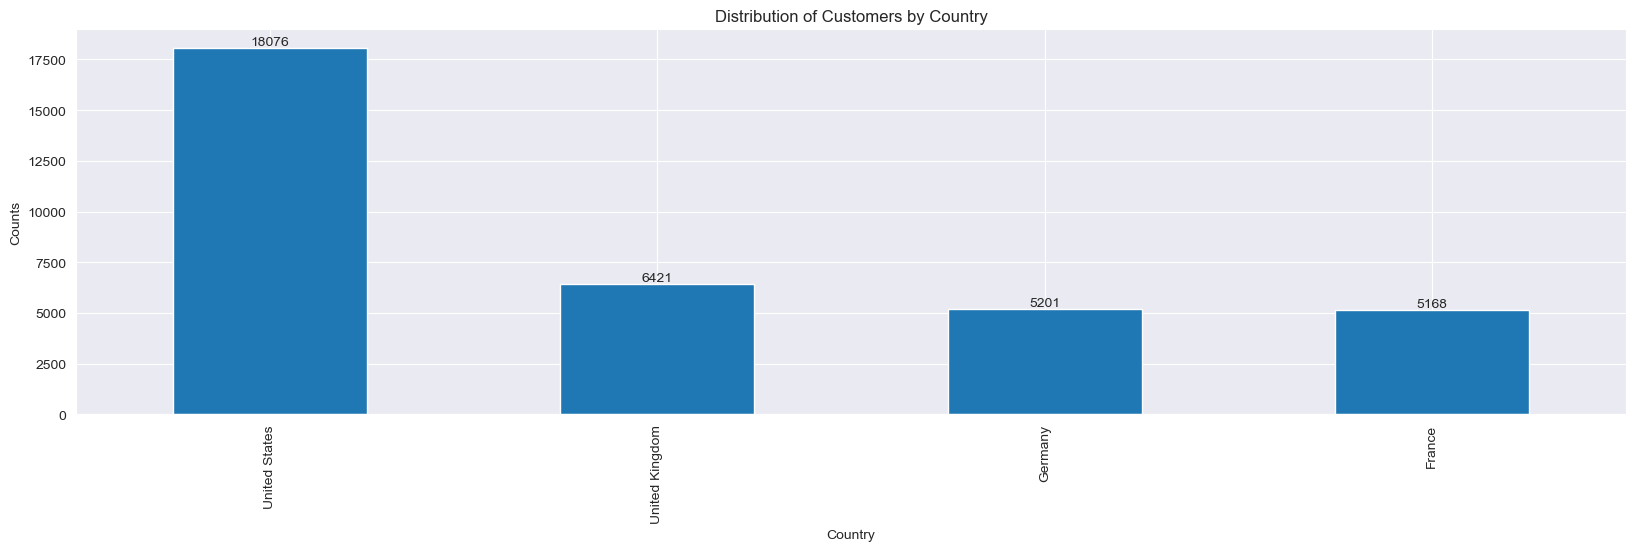

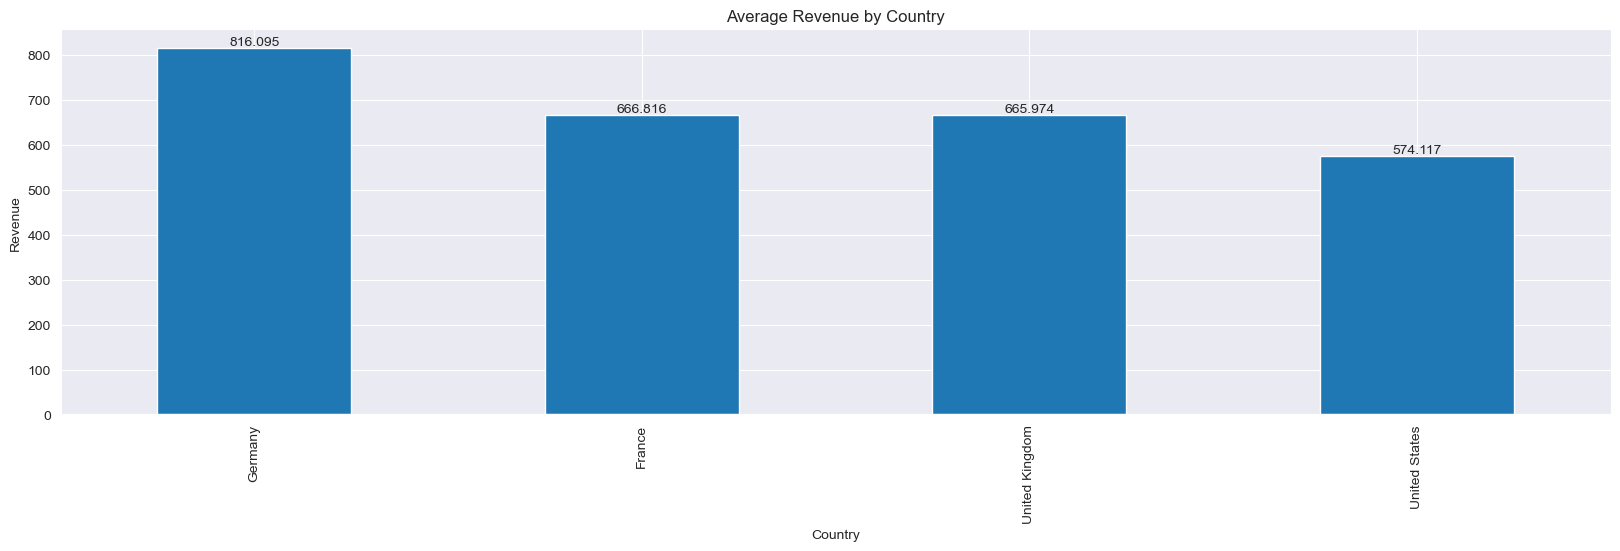

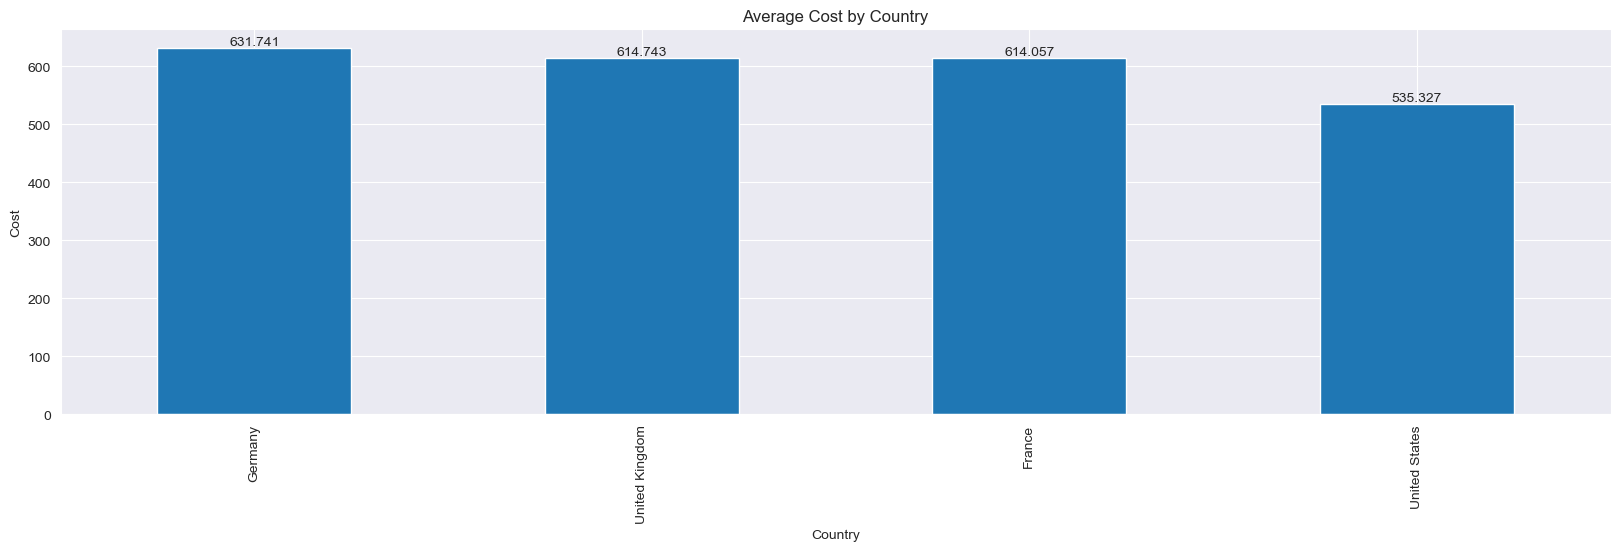

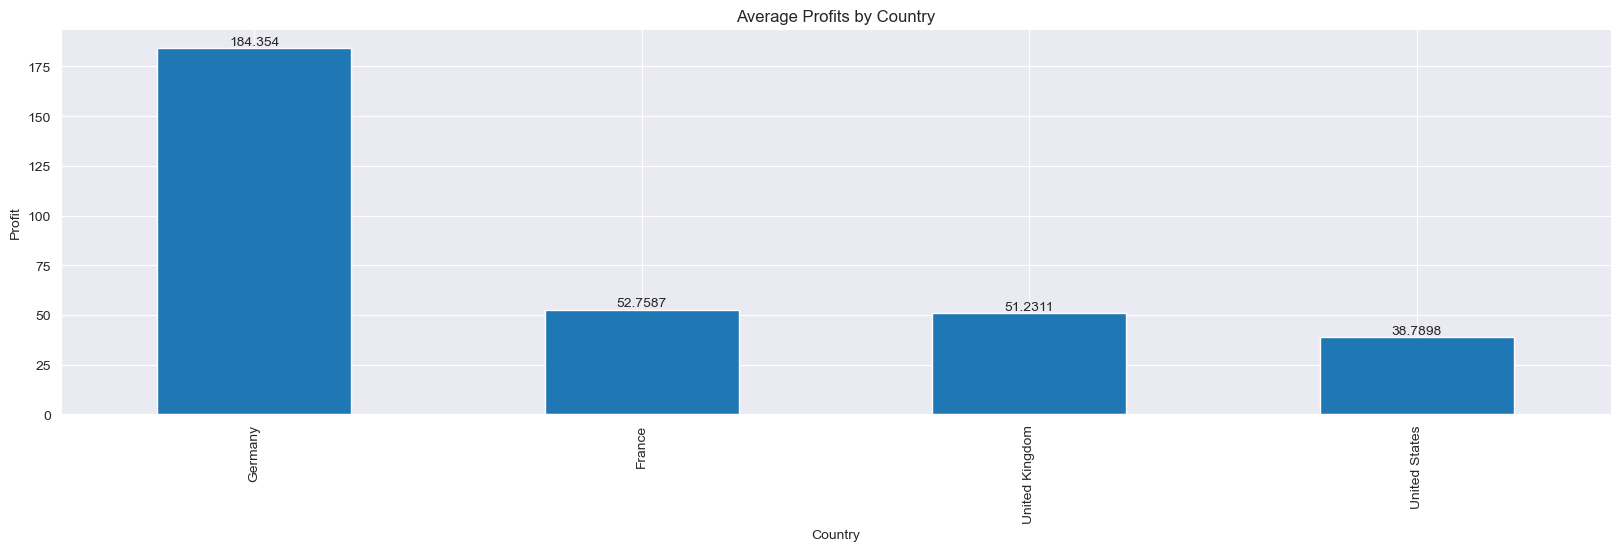

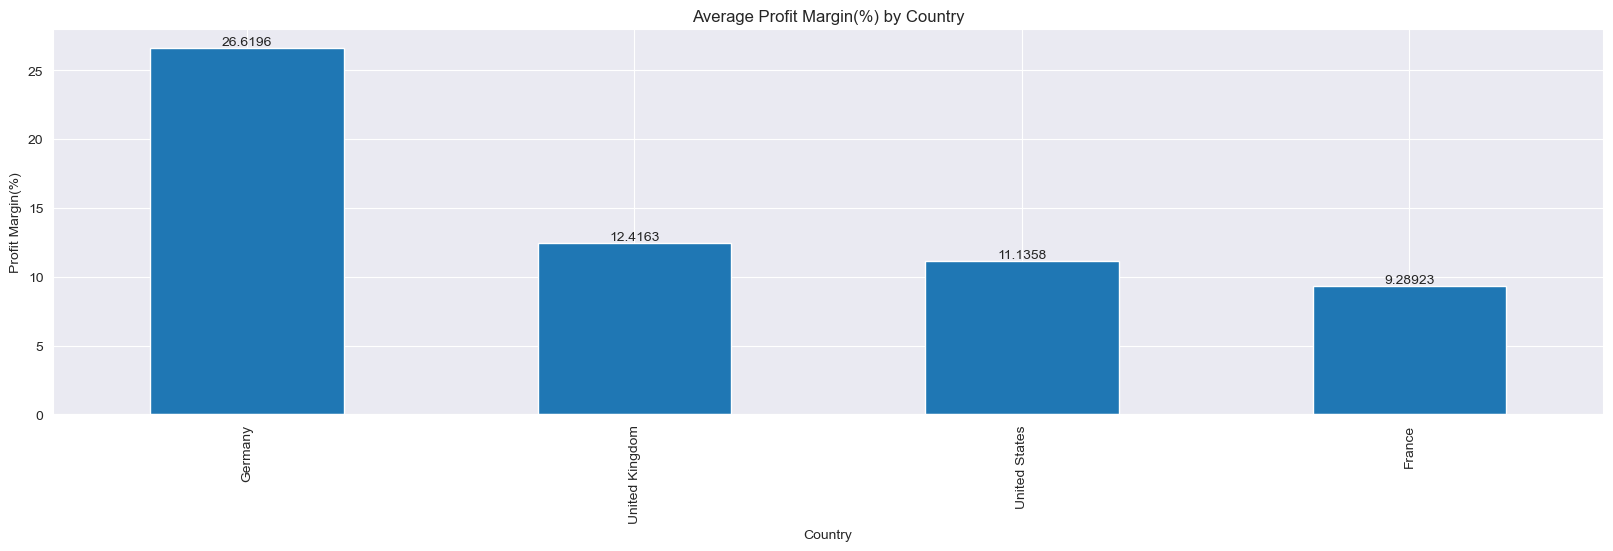

In [174]:
# bar plot of distribution of customers by Country
cust_count= df_csh['Country'].value_counts()
ax= cust_count.plot.bar()
ax.set_xlabel('Country')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Customers by Country')
ax.bar_label(ax.containers[0])
plt.show()

# bar plot comparing average revenues of countries
avg_rev= df_csh.groupby(['Country']).Revenue.mean()
avg_rev_sorted= avg_rev.sort_values(ascending= False)
ax= avg_rev_sorted.plot.bar()
ax.set_xlabel('Country')
ax.set_ylabel('Revenue')
ax.set_title('Average Revenue by Country')
ax.bar_label(ax.containers[0])
plt.show()

#bar plot comparing average costs of countries
avg_cost= df_csh.groupby(['Country']).Cost.mean()
avg_cost_sorted= avg_cost.sort_values(ascending= False)
ax= avg_cost_sorted.plot.bar()
ax.set_xlabel('Country')
ax.set_ylabel('Cost')
ax.set_title('Average Cost by Country')
ax.bar_label(ax.containers[0])
plt.show()

# bar plot of avg profits of countries
avg_profit= df_csh.groupby('Country')['Profit'].mean()
avg_profit_sorted= avg_profit.sort_values(ascending=False)
ax= avg_profit_sorted.plot.bar()
ax.set_xlabel('Country')
ax.set_ylabel('Profit')
ax.set_title('Average Profits by Country')
ax.bar_label(ax.containers[0])
plt.show()

# bar plot of average profitability of countries
avg_margin= df_csh.groupby('Country')['Profit Margin(%)'].mean()
margin_sorted= avg_margin.sort_values(ascending= False)
ax= margin_sorted.plot.bar()
ax.set_xlabel('Country')
ax.set_ylabel('Profit Margin(%)')
ax.set_title('Average Profit Margin(%) by Country')
ax.bar_label(ax.containers[0])
plt.show()

In [480]:
# filter dataframe for US only
US= df_csh[df_csh['Country']== 'United States']
US.reset_index(drop=True, inplace=True)
print(US.describe())

       Customer Age      Quantity     Unit Cost    Unit Price  Unit Margin  \
count  18076.000000  18076.000000  18076.000000  18076.000000  18076.00000   
mean      37.435550      2.004813    324.449237    348.122428     23.67319   
std       11.294503      0.813733    461.188152    471.281858     69.41118   
min       17.000000      1.000000      0.670000      0.666667   -472.00000   
25%       29.000000      1.000000     42.500000     50.000000      2.00000   
50%       37.000000      2.000000    137.500000    158.416667     10.50000   
75%       45.000000      3.000000    402.500000    459.500000     36.00000   
max       79.000000      3.000000   3120.000000   3887.000000    845.00000   

               Cost       Revenue        Profit  Profit Margin  \
count  18076.000000  18076.000000  18076.000000   18076.000000   
mean     535.327340    574.117172     38.789832       0.111358   
std      655.129861    665.077542    103.344773       0.104231   
min        2.000000      2.000000

**DEMAND/DISTRIBUTION**

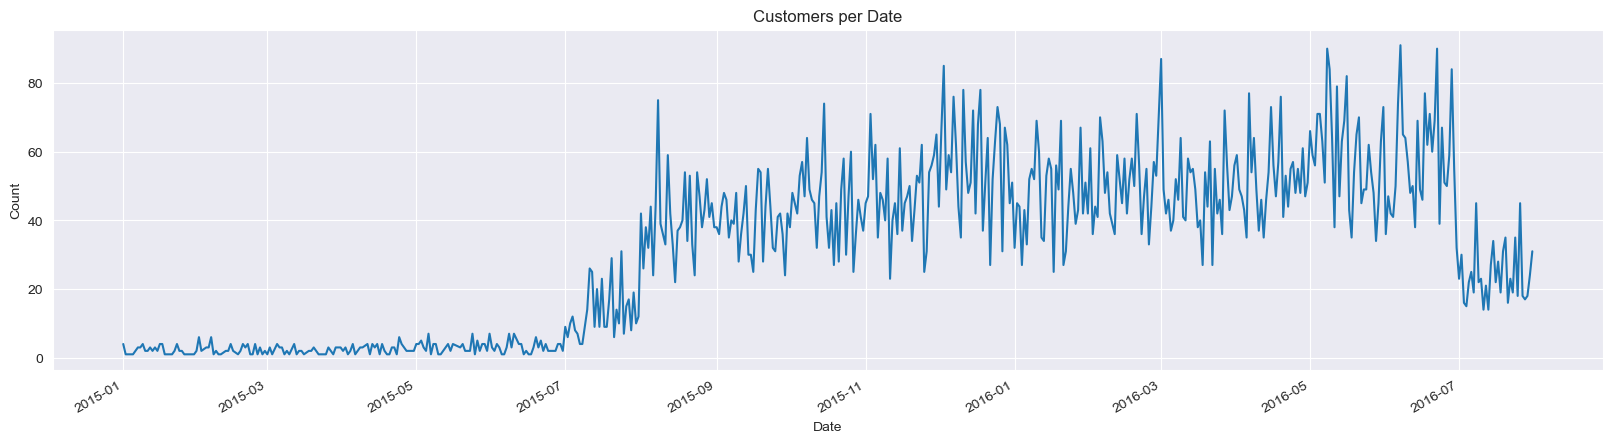

In [263]:
# customer count over time
counts_over_time= US['Date'].value_counts().sort_index()
counts_over_time.plot()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Customers per Date')
plt.show()


In [74]:
# customer distribution of US by states
print(US.value_counts('State').head(5))

# normalized distribution
US.value_counts('State', normalize=True).head(5)


State
California    10332
Washington     5204
Oregon         2446
Illinois         14
Texas            14
dtype: int64


State
California    0.571587
Washington    0.287896
Oregon        0.135318
Illinois      0.000775
Texas         0.000775
dtype: float64

In [76]:
# distribution of gender in US
print(US.value_counts('Customer Gender'))
US.value_counts('Customer Gender', normalize=True)

Customer Gender
M    9377
F    8699
dtype: int64


Customer Gender
M    0.518754
F    0.481246
dtype: float64

31-40    0.330328
41-50    0.251826
19-30    0.250996
51-60    0.121653
61-70    0.034963
0-18     0.009183
71+      0.001051
Name: Age Group, dtype: float64


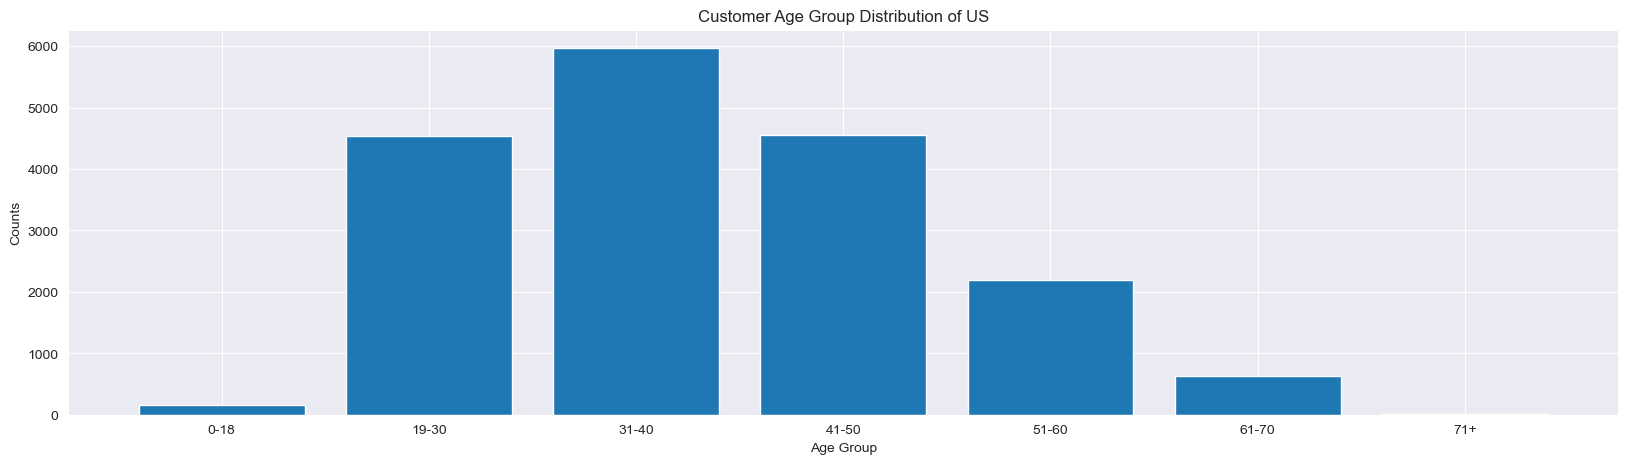

In [462]:
# create Age Group order for plotting
age_order= ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71+']
age_counts= US['Age Group'].value_counts().loc[age_order]

# normalize age group distribution
norm= US['Age Group'].value_counts(normalize=True)
print(norm)

# distribution of customer age in US
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Counts')
plt.title('Customer Age Group Distribution of US')
plt.show()

Tires and Tubes      0.324795
Bottles and Cages    0.161651
Helmets              0.111640
Mountain Bikes       0.074242
Road Bikes           0.068710
Jerseys              0.056650
Caps                 0.037232
Touring Bikes        0.031478
Fenders              0.028601
Shorts               0.025171
Cleaners             0.019473
Gloves               0.016375
Hydration Packs      0.013222
Socks                0.012945
Vests                0.010290
Bike Stands          0.004315
Bike Racks           0.003209
Name: Sub Category, dtype: float64


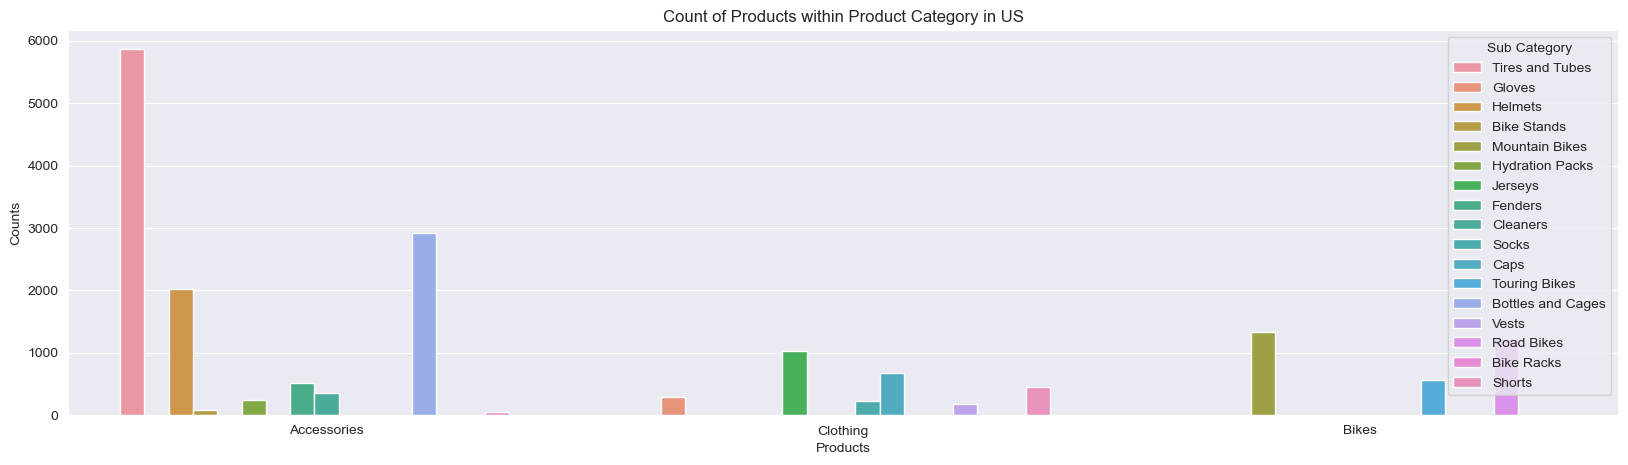

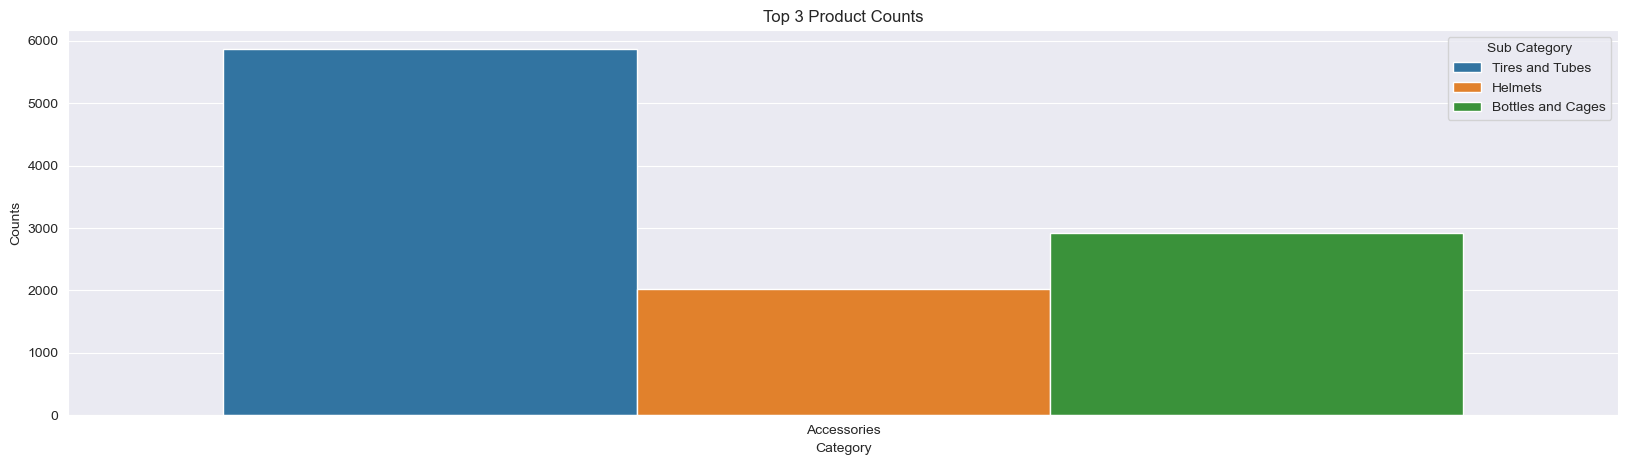

In [469]:
# calc counts for sub category
prod_counts= US['Sub Category'].value_counts()

# select top 3 sub category
top_prod_counts= prod_counts.nlargest(3).index

# normalize prod counts
norm_prod_counts= US['Sub Category'].value_counts(normalize=True)
print(norm_prod_counts)

# product distribution
sns.countplot(data= US, x= 'Product Category', hue= 'Sub Category')
plt.xlabel('Products')
plt.ylabel('Counts')
plt.title('Count of Products within Product Category in US')
plt.legend(title= 'Sub Category', loc= 'upper right')
plt.show()

# filter dataframe to only include top 3 sub categories
f_top_prod_counts= US[US['Sub Category'].isin(top_prod_counts)]

# plot top 5 Sub Categories
sns.countplot(data= f_top_prod_counts, x= 'Product Category', hue= 'Sub Category')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.title('Top 3 Product Counts')
plt.legend(title= 'Sub Category', loc= 'upper right')
plt.show()



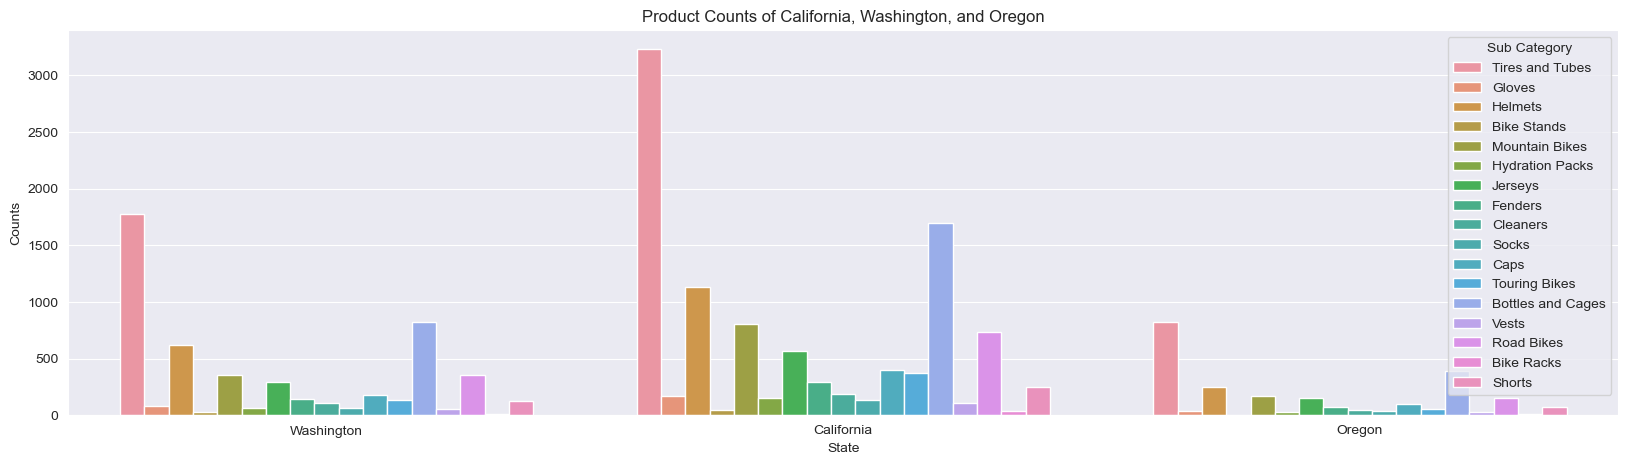

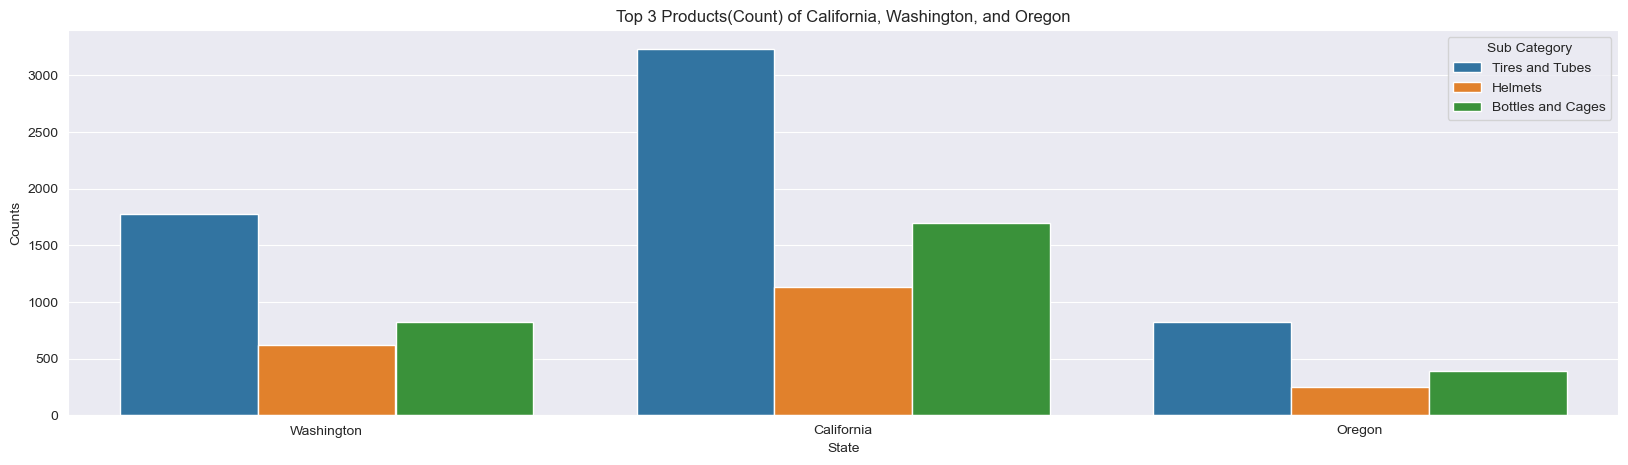

In [434]:
# select top 3 state counts
state_counts= US['State'].value_counts()
top_state_counts= state_counts.nlargest(3).index

# filter dataframe for top 3
CWO= US[US['State'].isin(top_state_counts)]

#plot CWO with Products
sns.countplot(data= CWO, x= 'State', hue= 'Sub Category')
plt.xlabel('State')
plt.ylabel('Counts')
plt.title('Product Counts of California, Washington, and Oregon')
plt.legend(title= 'Sub Category')
plt.show()

#select top 3 products and filter dataframe
prod_counts2= CWO['Sub Category'].value_counts()
CWO_top_prod= prod_counts2.nlargest(3).index
CWO_prod= CWO[CWO['Sub Category'].isin(CWO_top_prod)]

#plot new dataframe with top 3 Products(count) of Top 3 States(count)
sns.countplot(data= CWO_prod, x= 'State', hue= 'Sub Category')
plt.xlabel('State')
plt.ylabel('Counts')
plt.title('Top 3 Products(Count) of California, Washington, and Oregon')
plt.legend(title= 'Sub Category', loc= 'upper right')
plt.show()

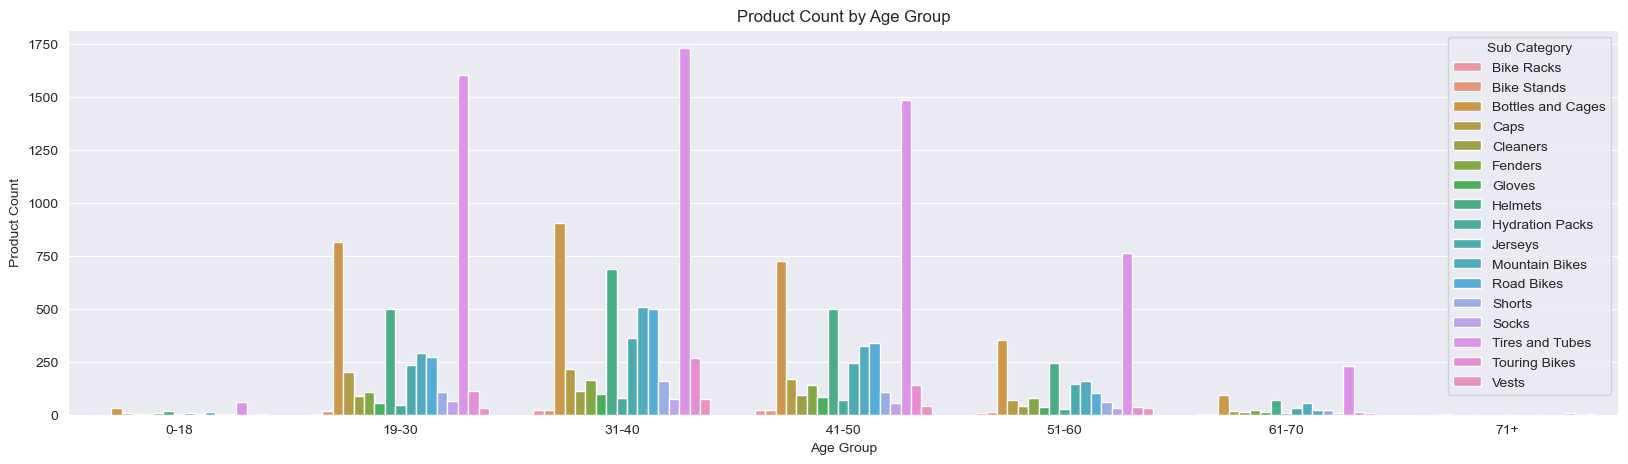

In [145]:
agegroup_prod= US.groupby(['Age Group', 'Sub Category']).size().reset_index(name= 'Counts')
sns.barplot(data= agegroup_prod, x= 'Age Group', y= 'Counts', hue= 'Sub Category')
plt.xlabel('Age Group')
plt.ylabel('Product Count')
plt.title('Product Count by Age Group')
plt.legend(title= 'Sub Category', loc= 'upper right')
plt.show()


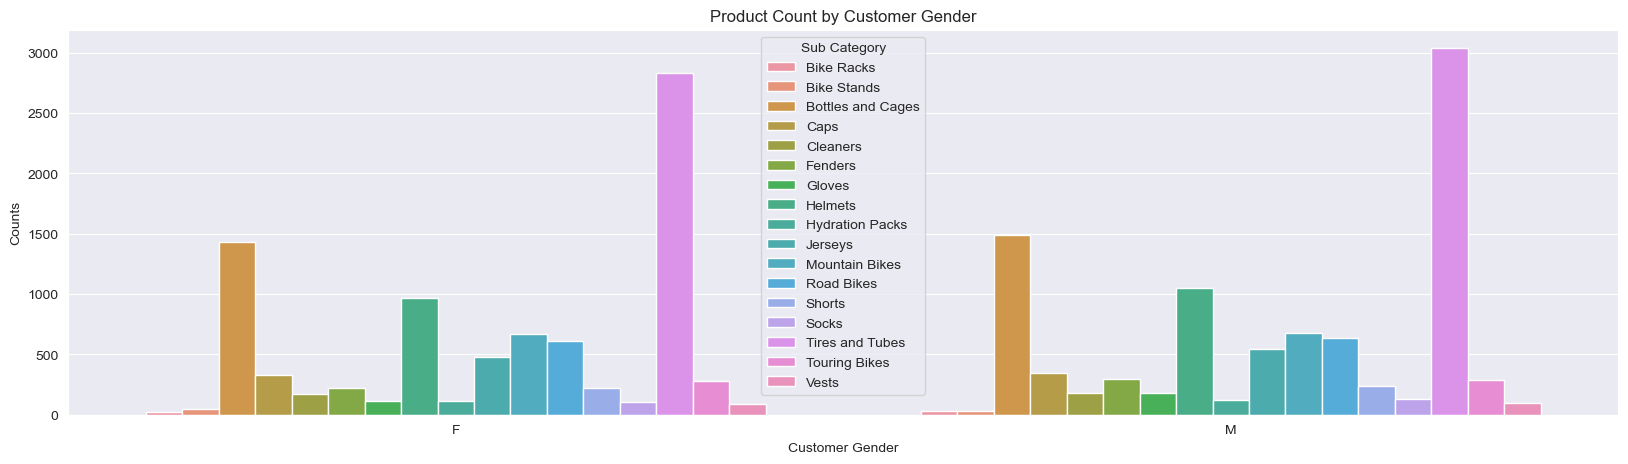

In [161]:
gendergroup_prod= US.groupby(['Customer Gender', 'Sub Category']).size().reset_index(name= 'Counts')
sns.barplot(data= gendergroup_prod, x= 'Customer Gender', y= 'Counts', hue= 'Sub Category')
plt.xlabel('Customer Gender')
plt.ylabel('Counts')
plt.title('Product Count by Customer Gender')
plt.show()


**PROFITABILITY**

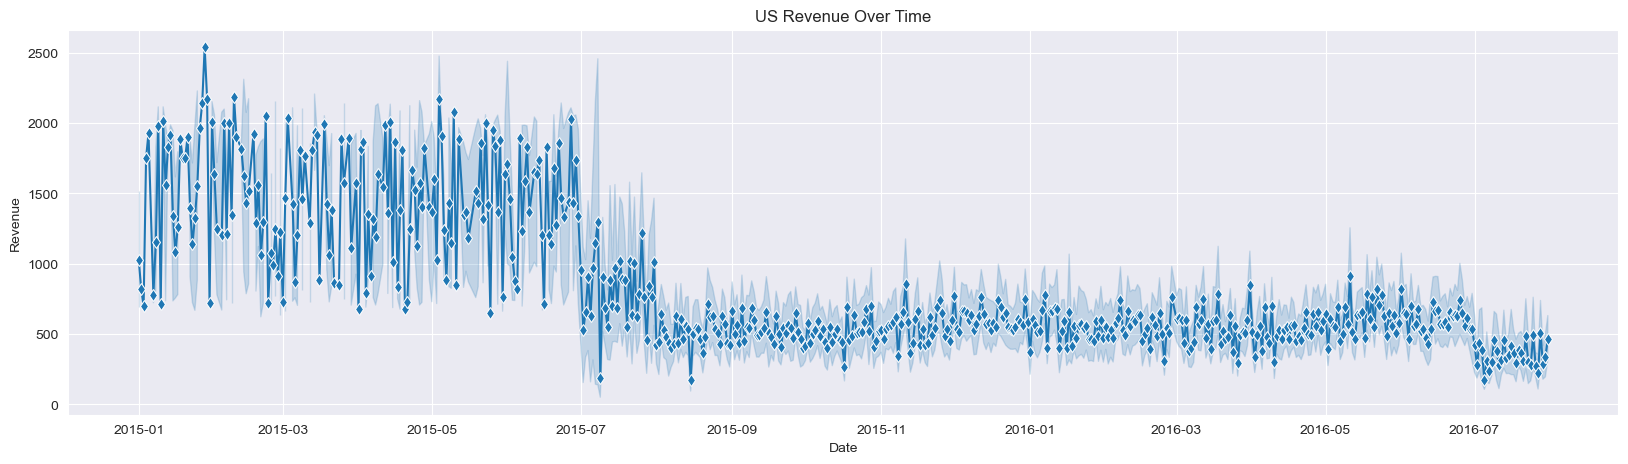

The total US revenue is:  10377742.0
The total US cost is:  9676577.0
The total US profit is:  701165.0
The average US profit margin is:  11.1358352667027 %


In [482]:
# US revenue over time
sns.lineplot(x= 'Date', y= 'Revenue', data= US, marker= 'd')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('US Revenue Over Time')
plt.show()

# determine revenue in US
US_rev= US['Revenue'].sum()
print("The total US revenue is: ", US_rev)

# determine cost in US
US_cost= US['Cost'].sum()
print("The total US cost is: ", US_cost)

# determine profit in US
US_profit= US['Profit'].sum()
print("The total US profit is: ", US_profit)

# determine average profit margin(%) in US
US_avg_PM= US['Profit Margin(%)'].mean()
print("The average US profit margin is: ", US_avg_PM, "%")

In [492]:
# determine overall revenue, cost, & profit, and average profit margin(%) by states
state_rev= US.groupby('State')['Revenue'].sum()
state_cost= US.groupby('State')['Cost'].sum()
state_profit= US.groupby('State')['Profit'].sum()
state_avg_pm= US.groupby('State')['Profit Margin(%)'].mean()

# determine average profit margin(%) of grouped top prod by sub category
avg_pm_top_prod= f_top_prod_counts.groupby('Sub Category')['Profit Margin(%)'].mean().reset_index()
print("US average Profit Margins for Top Products:",avg_pm_top_prod)

# determine top 3 states in revenue, cost, profit, and profit margin(%)
top_state_rev= state_rev.nlargest(3)
top_state_cost= state_cost.nlargest(3)
top_state_profit= state_profit.nlargest(3)
top_state_avg_pm= state_avg_pm.nlargest(3)
print("Top 3 in Overall Rev:", top_state_rev)
print(" ")
print("Top 3 in Overall Cost:", top_state_cost)
print(" ")
print("Top 3 in Overall Profit:", top_state_profit)
print(" ")
print("Top 3 in Avg Profit Margin(%):", top_state_avg_pm)
print(" ")

# filter dataframe for California, Washington, and Oregon independently
cali= US[US['State']== 'California']
wash= US[US['State']== 'Washington']
oreg= US[US['State']== 'Oregon']

# determine average profit margin(%) for California, Washington, and Oregon independently
cali_avg_pm= cali['Profit Margin(%)'].mean()
wash_avg_pm= wash['Profit Margin(%)'].mean()
oreg_avg_pm= oreg['Profit Margin(%)'].mean()
print("California Avg Profit Margin(%):", cali_avg_pm)
print("Washington Avg Profit Margin(%):", wash_avg_pm)
print("Oregon Avg Profit Margin(%):", oreg_avg_pm)
print(" ")

#determine average profit margin(%) of California, Washington, & Oregon combined
CWO_avg_pm= CWO['Profit Margin(%)'].mean()
print("CWO Combined Avg Profit Margin(%):", CWO_avg_pm)
print(" ")

# determine sum of (California, Washington, and Oregon) revenue, cost, and profit 
CWO_rev= CWO['Revenue'].sum()
CWO_cost= CWO['Cost'].sum()
CWO_profit= CWO['Profit'].sum()

# filter dataframe for all other states
other_states= US[~US['State'].isin(CWO['State'])]

# determine sum of all other states, revenue, cost, profit, & average Profit Margin(%)
other_states_rev= other_states['Revenue'].sum()
other_states_cost= other_states['Cost'].sum()
other_states_profit= other_states['Profit'].sum()
other_states_pm= other_states['Profit Margin(%)'].mean()

# determine percentage of combined CWO revenue, cost, and profit
CWO_of_whole_rev= (CWO_rev/US_rev)*100
CWO_of_whole_cost= (CWO_cost/US_cost)*100
CWO_of_whole_profit= (CWO_profit/US_profit)*100

#print percents
print("CWO % Revenue of US:", CWO_of_whole_rev, "%")
print("CWO % Cost of US:", CWO_of_whole_cost, "%")
print("CWO % Profit of US:", CWO_of_whole_profit, "%")
print(" ")


US average Profit Margins for Top Products:         Sub Category  Profit Margin(%)
0  Bottles and Cages         14.736861
1            Helmets         14.125871
2    Tires and Tubes         14.179118
Top 3 in Overall Rev: State
California    6076916.0
Washington    2873511.0
Oregon        1383186.0
Name: Revenue, dtype: float64
 
Top 3 in Overall Cost: State
California    5683868.0
Washington    2666454.0
Oregon        1284924.0
Name: Cost, dtype: float64
 
Top 3 in Overall Profit: State
California    393048.0
Washington    207057.0
Oregon         98262.0
Name: Profit, dtype: float64
 
Top 3 in Avg Profit Margin(%): State
South Carolina    22.346247
Kentucky          18.358298
Minnesota         17.315072
Name: Profit Margin(%), dtype: float64
 
California Avg Profit Margin(%): 10.948563768063659
Washington Avg Profit Margin(%): 11.37963522415522
Oregon Avg Profit Margin(%): 11.3884982685291
 
CWO Combined Avg Profit Margin(%): 11.13315812050713
 
CWO % Revenue of US: 99.57477262394845 

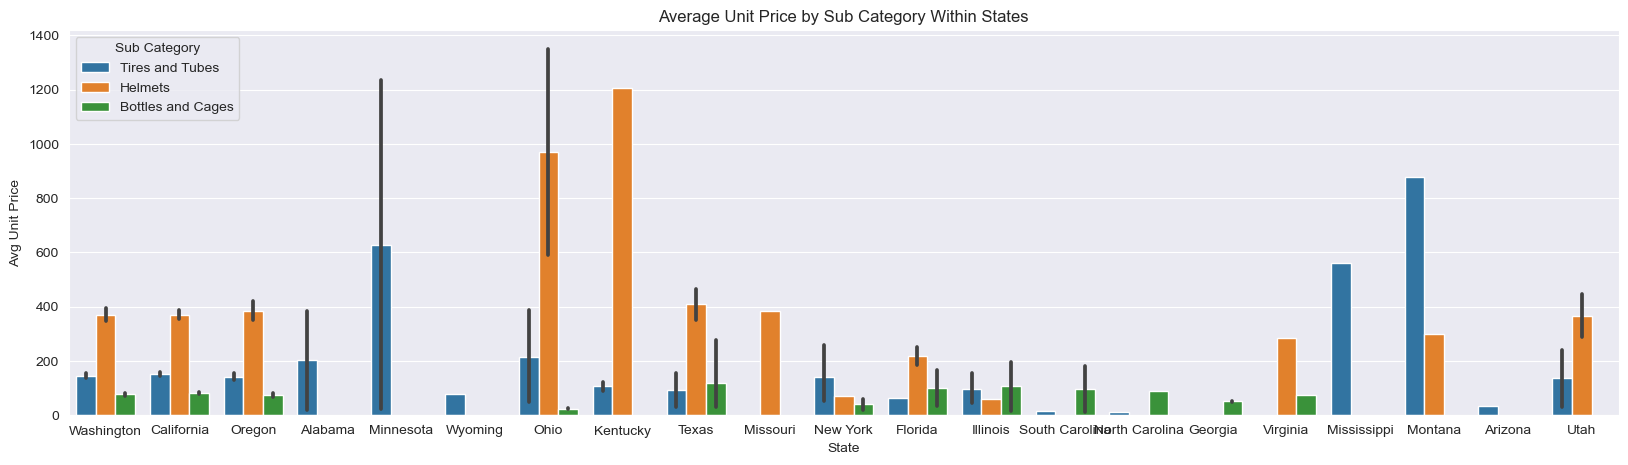

Avg Unit Price for CWO: 348.4583194294841
Avg Unit Price for All Other States: 283.8670212765958


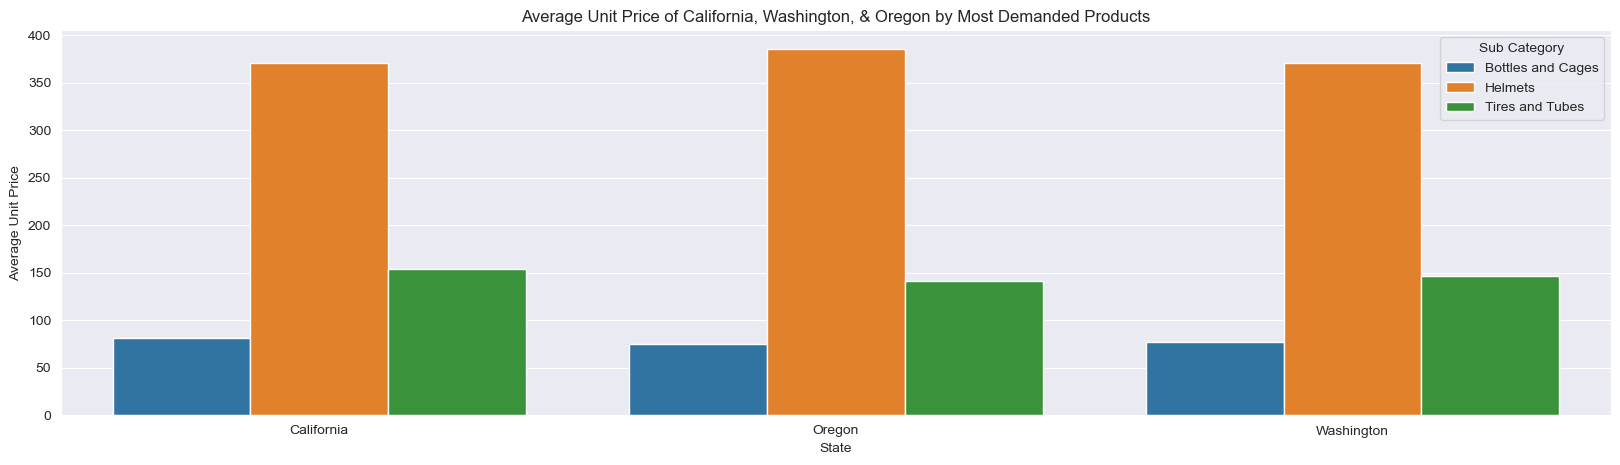

In [501]:
# determine average unit price by state and top prod
f_top_prod_counts.groupby(['State', 'Sub Category'])['Unit Price'].mean().reset_index()
sns.barplot(x= 'State', y= 'Unit Price', hue= 'Sub Category', data= f_top_prod_counts)
plt.xlabel('State')
plt.ylabel('Avg Unit Price')
plt.title('Average Unit Price by Sub Category Within States')
plt.savefig("Avg Unit Price by Sub Category Within States.jpg")
plt.show()

# determine average unit price for California, Washington, and Oregon
CWO_avg_Up= CWO['Unit Price'].mean()
print("Avg Unit Price for CWO:", CWO_avg_Up)

# determine average unit price for all other states
other_states_avg_Up= other_states['Unit Price']. mean()
print("Avg Unit Price for All Other States:", other_states_avg_Up)

# plot California, Washington, and Oregon average unit price
avg_Up_by_CWO= CWO_prod.groupby(['State', 'Sub Category'])['Unit Price'].mean().reset_index()
sns.barplot(x= 'State', y= 'Unit Price', hue= 'Sub Category', data= avg_Up_by_CWO)
plt.xlabel('State')
plt.ylabel('Average Unit Price')
plt.title('Average Unit Price of California, Washington, & Oregon by Most Demanded Products')
plt.show()

In [ ]:
# create lineplot of california tires and tubes average unit price over time
sns.lineplot(x= cali_tires_tubes['Date'], y= cali_tt_avg_p['Unit Price'], data= cali_tires_tubes, marker= 'o')
plt.xlabel('Date')
plt.ylabel('Average Unit Price')
plt.title('California Tires and Tubes Avg Unit Price Over Time')
plt.show()

# create lineplot of california tires and tubes sum quantity over time
sns.lineplot(x= cali_tires_tubes['Date'], y= cali_tt_sum_q['Quantity'], data= cali_tires_tubes, marker= 'o')
plt.xlabel('Date')
plt.ylabel('Sum of Quantity Sold')
plt.title('California Tires and Tubes Sum of Quantity Sold Over Time')
plt.show()

Average Unit Price for Top Products(Counts) in California, Washington, & Oregon <bound method Series.reset_index of State       Sub Category     
California  Bottles and Cages     81.258210
            Helmets              370.703116
            Tires and Tubes      153.429749
Oregon      Bottles and Cages     75.443873
            Helmets              385.730159
            Tires and Tubes      141.571951
Washington  Bottles and Cages     77.319123
            Helmets              370.574554
            Tires and Tubes      146.594301
Name: Unit Price, dtype: float64>


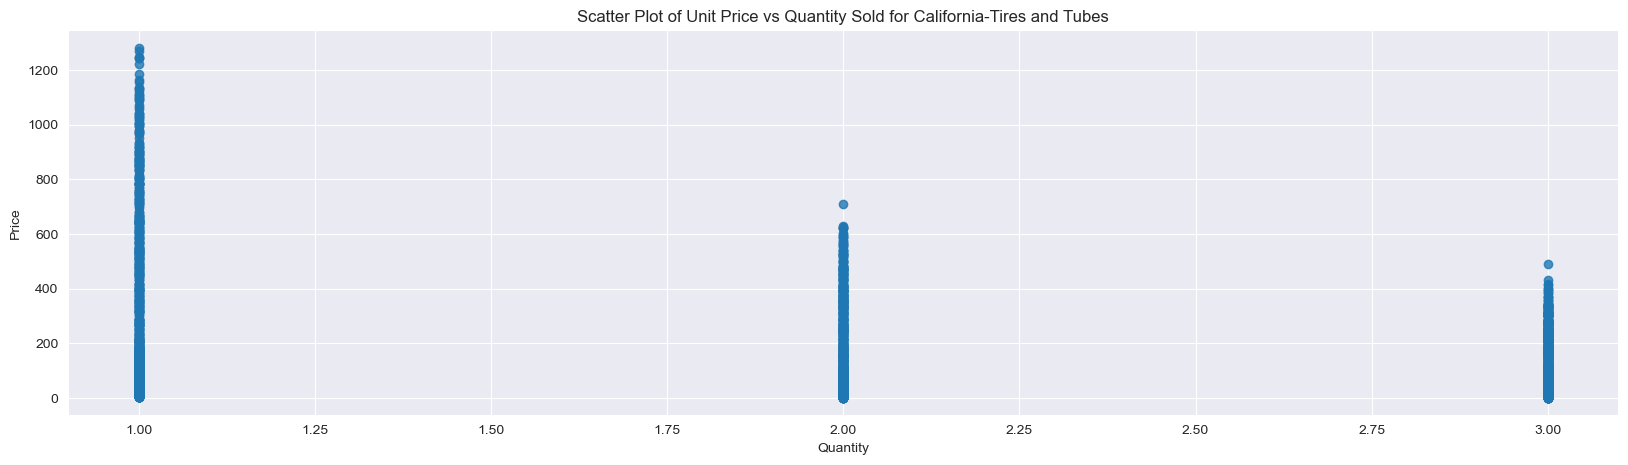

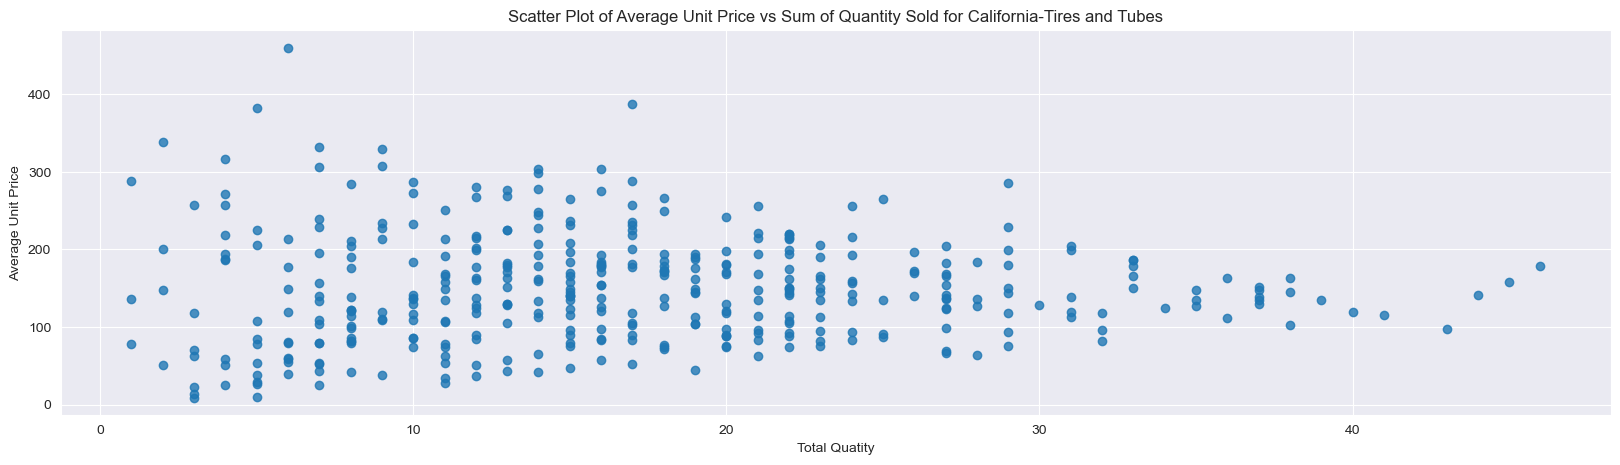

Correlation of Unit Price and Quantity Sold: 0.10245773346874566
Correlation of Avg Unit Price and Sum of Quantity Sold: 2.7528957854264576e-07


In [507]:
# determine average unit price for each top product within each state
avg_CWO_Uprice= CWO_prod.groupby(['State', 'Sub Category'])['Unit Price'].mean().reset_index
print("Average Unit Price for Top Products(Counts) in California, Washington, & Oregon", avg_CWO_Uprice)

# filter cali dataframe for 'Tires and Tubes', 'Bottles and Cages', and 'Helmets'
cali_tires_tubes= cali[cali['Sub Category']== 'Tires and Tubes']
cali_bottles_cages= cali[cali['Sub Category']== 'Bottles and Cages']
cali_helmets= cali[cali['Sub Category']== 'Helmets']

# determine average unit price and average & sum of quantity bought of tires and tubes in California
cali_tt_avg_p= cali_tires_tubes.groupby('Date')['Unit Price'].mean().reset_index()
cali_tt_avg_q= cali_tires_tubes.groupby('Date')['Quantity'].mean().reset_index()
cali_tt_sum_q= cali_tires_tubes.groupby('Date')['Quantity'].sum().reset_index()

# scatter plot of unit price vs quantity
sns.regplot(x= 'Quantity', y= 'Unit Price', data= cali_tires_tubes, fit_reg=False)
plt.title('Scatter Plot of Unit Price vs Quantity Sold for California-Tires and Tubes')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.savefig("Scatter PLot of Unit Price vs Quantity.jpg")
plt.show()

# scatter plot of average unit price vs sum of quantity
sns.regplot(x= cali_tt_sum_q['Quantity'], y= cali_tt_avg_p['Unit Price'], data= cali_tires_tubes, fit_reg=False)
plt.title('Scatter Plot of Average Unit Price vs Sum of Quantity Sold for California-Tires and Tubes')
plt.xlabel('Total Quatity')
plt.ylabel('Average Unit Price')
plt.show()

# calculate correlation of tires and tubes' unit price and quantity
tt_r1= cali_tires_tubes['Unit Price'].corr(cali_tires_tubes['Quantity'])
tt_rsq1= tt_r1**2
print("Correlation of Unit Price and Quantity Sold:",tt_rsq1)

tt_r2= cali_tt_avg_p['Unit Price'].corr(cali_tt_sum_q['Quantity'])
tt_rsq2= tt_r2**2
print("Correlation of Avg Unit Price and Sum of Quantity Sold:", tt_rsq2)


                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                 0.0001052
Date:                Thu, 15 Feb 2024   Prob (F-statistic):              0.992
Time:                        19:49:27   Log-Likelihood:                -1392.6
No. Observations:                 384   AIC:                             2789.
Df Residuals:                     382   BIC:                             2797.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8569      1.102     15.299      0.0

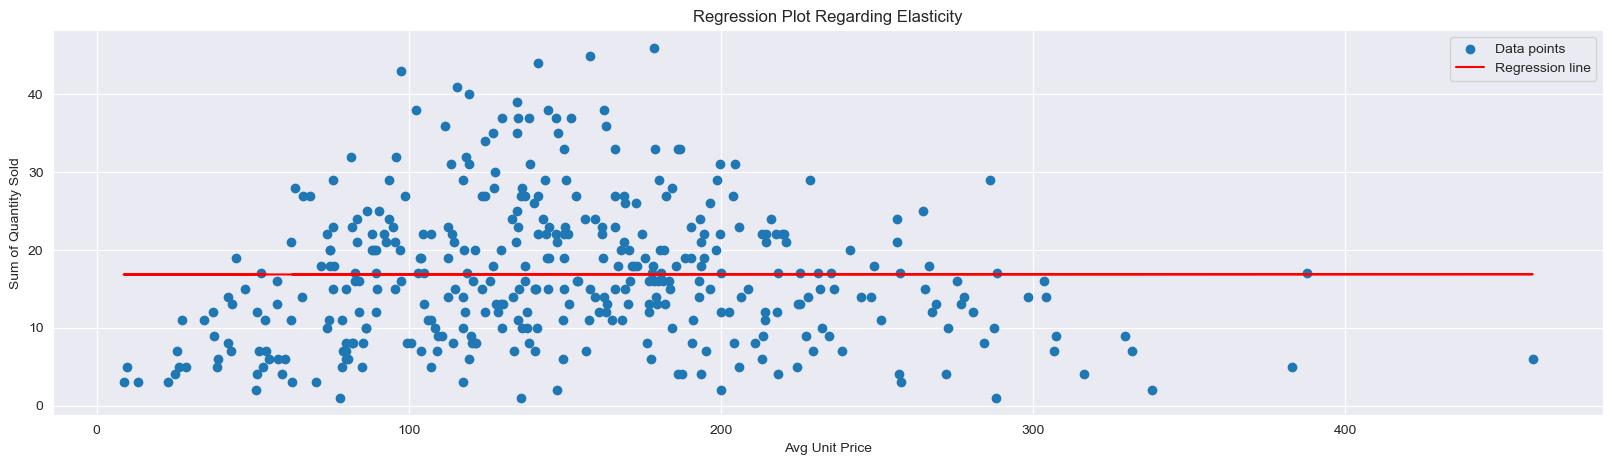

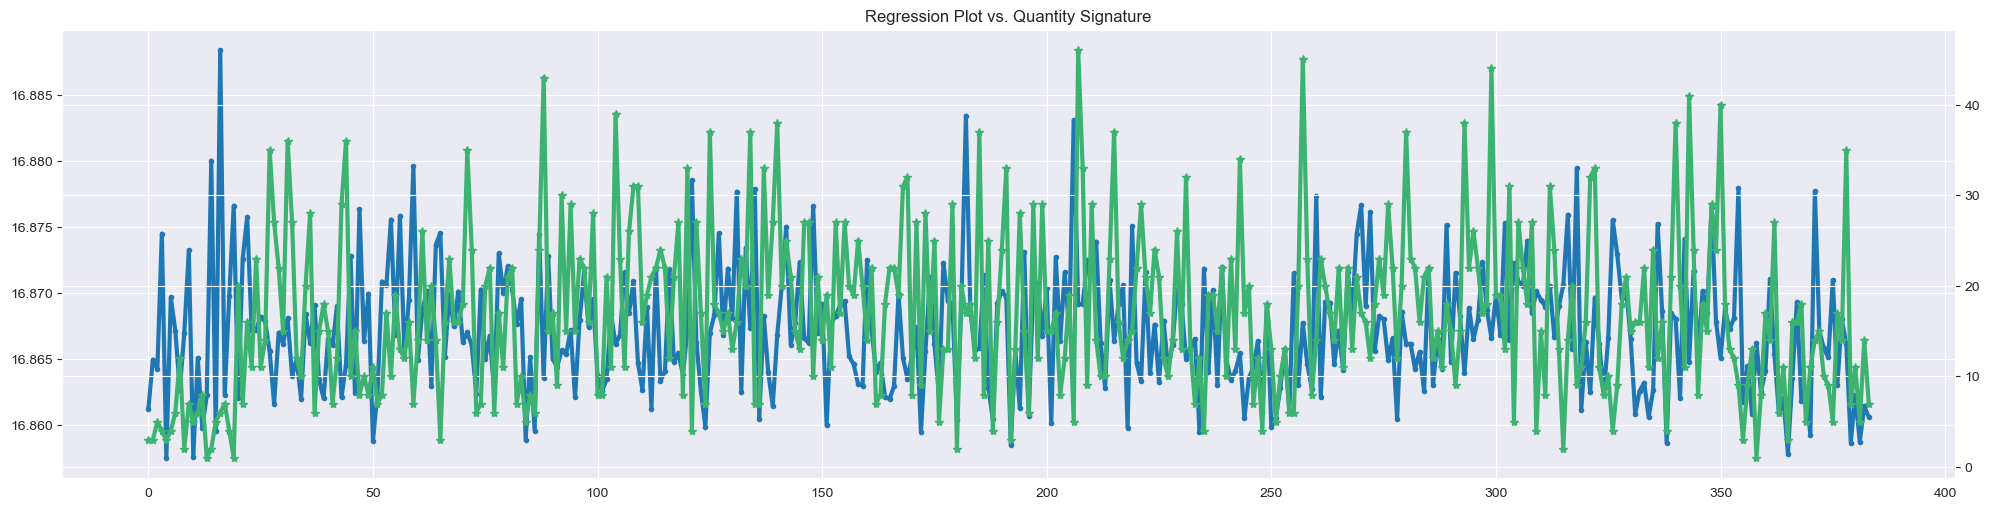

In [496]:
# Build OLS regression model
X = cali_tt_avg_p['Unit Price']
y = cali_tt_sum_q['Quantity']
X = sm.add_constant(X)
model=sm.OLS(y,X).fit()
elasticity_estimate= model.params['Unit Price']
print(model.summary())
print("Elasticity Estimate:", elasticity_estimate)

# visualize the results
plt.scatter(cali_tt_avg_p['Unit Price'], cali_tt_sum_q['Quantity'], label='Data points')
plt.plot(cali_tt_avg_p['Unit Price'], model.predict(X), color='red', label='Regression line')
plt.xlabel('Avg Unit Price')
plt.ylabel('Sum of Quantity Sold')
plt.title('Regression Plot Regarding Elasticity')
plt.legend()
plt.savefig("OLS regression scatter.jpg")
plt.show()

# validate predictions
ax= model.predict(X).plot(linewidth=3, marker= '.')
ax2= ax.twinx()
ax2.plot(cali_tt_sum_q['Quantity'], 'mediumseagreen', linewidth= 3, marker='*')
plt.tight_layout()
plt.title("Regression Plot vs. Quantity Signature")
plt.savefig("OLS validation plot.jpg")
plt.show()

In [491]:
# set index and find avg unit price by month
cali_tires_tubes.index= pd.DatetimeIndex(cali_tires_tubes['Date'])
monthly_p_avg= cali_tires_tubes.resample('M').mean()
avg_price_by_month= monthly_p_avg['Unit Price']
print('Average Unit Price by Month:', avg_price_by_month)
print(" ")

# find difference in avg unit price by consecutive rows(months)
diff_price= avg_price_by_month.diff()
print('Difference in Unit Price from Previous Month:', diff_price)
print(" ")

# extract values to divide
values_price= avg_price_by_month.values
price_diff= diff_price.values

# perform division
perc_chng_price= (price_diff[1:]/values_price[:-1])*100
print("Monthly Percent Change in Price:", perc_chng_price)


Average Unit Price by Month: Date
2015-07-31    147.362319
2015-08-31    135.203562
2015-09-30    169.131061
2015-10-31    151.649775
2015-11-30    152.117647
2015-12-31    145.939979
2016-01-31    168.718412
2016-02-29    168.120443
2016-03-31    126.826211
2016-04-30    163.040754
2016-05-31    168.212568
2016-06-30    155.304348
2016-07-31    127.000000
Freq: M, Name: Unit Price, dtype: float64
 
Difference in Unit Price from Previous Month: Date
2015-07-31          NaN
2015-08-31   -12.158756
2015-09-30    33.927498
2015-10-31   -17.481286
2015-11-30     0.467872
2015-12-31    -6.177668
2016-01-31    22.778433
2016-02-29    -0.597969
2016-03-31   -41.294232
2016-04-30    36.214543
2016-05-31     5.171814
2016-06-30   -12.908220
2016-07-31   -28.304348
Freq: M, Name: Unit Price, dtype: float64
 
Monthly Percent Change in Price: [ -8.25092641  25.09364226 -10.33594053   0.30852158  -4.06111231
  15.60808301  -0.35441825 -24.56229071  28.55446297   3.17209895
  -7.67375507 -18.2250839

In [471]:
# find sum of quantities by month
monthly_q_sum= cali_tires_tubes.resample('M').sum()
sum_quant_by_month= monthly_q_sum['Quantity']
print('Sum of Quantities by Month:', sum_quant_by_month)
print(" ")

# find difference in quantity sum by consecutive rows(months)
diff_quant= sum_quant_by_month.diff()
print('Difference in Quantity from Previous Month:', diff_quant)
print(" ")

# extract values to divide
values_quant= sum_quant_by_month.values
quant_diff= diff_quant.values

# perform division
perc_chng_quant= (quant_diff[1:]/values_quant[:-1])*100
print("Monthly Percent Change in Quantity:", perc_chng_quant)
print(" ")

# calculate elasticity of demand
EoD= perc_chng_quant/perc_chng_price
print("Elasticity of Demand:", EoD)
print(" ")

# convert values to absolute values
abs_values= np.absolute(EoD)
print('Absolute Values of EoD:', abs_values)
print(" ")

# find average elasticity of demand
avg_EoD= abs_values.mean()
print('Average Elasticity of Demand:', avg_EoD)

Sum of Quantities by Month: Date
2015-07-31     94
2015-08-31    534
2015-09-30    437
2015-10-31    590
2015-11-30    608
2015-12-31    608
2016-01-31    535
2016-02-29    521
2016-03-31    487
2016-04-30    549
2016-05-31    615
2016-06-30    537
2016-07-31    362
Freq: M, Name: Quantity, dtype: int32
 
Difference in Quantity from Previous Month: Date
2015-07-31      NaN
2015-08-31    440.0
2015-09-30    -97.0
2015-10-31    153.0
2015-11-30     18.0
2015-12-31      0.0
2016-01-31    -73.0
2016-02-29    -14.0
2016-03-31    -34.0
2016-04-30     62.0
2016-05-31     66.0
2016-06-30    -78.0
2016-07-31   -175.0
Freq: M, Name: Quantity, dtype: float64
 
Monthly Percent Change in Quantity: [468.08510638 -18.16479401  35.01144165   3.05084746   0.
 -12.00657895  -2.61682243  -6.52591171  12.73100616  12.02185792
 -12.68292683 -32.58845438]
 
Elasticity of Demand: [-56.73121816  -0.72388033  -3.38734937   9.88860303  -0.
  -0.76925391   7.38343035   0.26568824   0.44584996   3.78987482
   1.6

**INSIGHTS**

    On preliminary exploration of the data, it's determined, that although, Germany has the highest revenue and profits, the US has the largest customer base, indicating high demand and potential profitability improvement through price increases.
    
    By exploring demand and distribution through segmentation, the location and concentration of the US market can be determined. California, Washington, and Oregon contain the majority of the US market(~99% together). Demand is split pretty evenly between customer gender, with males making up 52% of the market and females making up the rest at 48%. The average age of customers in the US is 37. The age group with the highest number of customers in the US are 31-40 year olds, followed by 41-50 year olds and 19-30 year olds. Together they make up 83% of the US market. It's clear that in the US, the products that are in most demand are Tires and Tubes, Bottles and Cages, and Helmets. This is true across all segments. Together, they make up about 60% of all products sold.
    
    Although California, Washington, and Oregon, bring in the most revenue(99%) and profits(99%), they also incur the most costs of the US market(99%). They have a lower average unit price and profit margin compared to other states.
    
    With California having over 50% of the market share and Tires and Tubes making up 1/3 of the product market in the US, these were selected as the target segments to drill down on, to determine if prices of the highest demanded products should be increased, to boost overall profitability.
    
    Time series analysis of California's Tires and Tubes average unit price over time compared to total quantity sold over time visualizes a mostly, inverse relationship. Scatter plots reveal that quantity purchased at each independent amount(1, 2, and 3) show some inelastic properties independently, but it is also apparent more customers only buy 1 when prices are high and more customers purchase 2 or 3 at lower prices. This is on more of a smaller transactional scale. A scatter plot of average unit price on the y-axis vs total quantity on the x-axis drew conflicting conclusions with a broad spread of data points with linear-like configurations, displaying some elastic and inelastic properties. Correlation of the two variables is weak, which the OLS regression model also displayed with a low r^2, revealing poor "goodness of fit". There doesn't appear to be a linear relationship. When validating predictions with the OLS regression model, the resulting dual plot indicates inverse relations between average unit price and total quantity. In an effort to gain more understanding of the price elasticity of demand, regarding Tires and Tubes in California, another method is utilized.
    
    By segmenting California's Tires and Tubes price and quantity data over time, into monthly averages of price and monthly total quantities sold, the Price Elasticity of Demand equation is able to be implemented. The absolute value of the % change in Quantity over the % change in Unit Price was determined, to reveal an average EoD of 7.24, indicating an elastic relationship between Quantity and Price for Tires and Tubes in California. This means that consumers are highly responsive to price changes. Specifically, the result of this equation indicates that for every 1% increase in price leads to a 7.24% decrease in quantity demanded and vice versa. It is important to recognize other factors may be at play as well, such as seasonality, location, and marketing. This is the result for a specific product in a specific state, over a designated time frame.  While, this could potentially be indicative of similar outcomes regarding price elasticity for similar markets with similar demands(like Washington and Oregon, and, bottles and cages), this analysis should be carried out independently for all segments, to obtain a more precise view and understanding of the market. In conclusion, based off this analysis, it is not recommended to increase price of Tires and Tubes in California. On the contrary, it might be beneficial to lower prices a bit, to increase demand, and potentially, profitability.

